### Agenda
* Ops in a Computational Graph
* Layering Nested Layers
* Working with Multiple Layers
* Implementing Loss Functions
* Implementing BackPropogation
* Working with Batch & Stochastic Training
* Evaluating Models

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
x_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
m_const = tf.constant(3.)

In [3]:
my_product = tf.mul(x_data,m_const)

In [8]:
sess = tf.Session()
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data:x_val}))

3.0
9.0
15.0
21.0
27.0


### Layering Nested Operations

In [9]:
my_array = np.array([[1., 3., 5., 7., 9.],
                   [-2., 0., 2., 4., 6.],
                   [-6., -3., 0., 3., 6.]])

x_vals = np.array([my_array, my_array + 1])

x_data = tf.placeholder(tf.float32, shape=(3, 5))

In [10]:
x_vals

array([[[  1.,   3.,   5.,   7.,   9.],
        [ -2.,   0.,   2.,   4.,   6.],
        [ -6.,  -3.,   0.,   3.,   6.]],

       [[  2.,   4.,   6.,   8.,  10.],
        [ -1.,   1.,   3.,   5.,   7.],
        [ -5.,  -2.,   1.,   4.,   7.]]])

In [11]:
m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

In [12]:
prod1 = tf.matmul(x_data, m1)

In [13]:
prod2 = tf.matmul(prod1, m2)

In [14]:
m1

<tf.Tensor 'Const_1:0' shape=(5, 1) dtype=float32>

In [15]:
add1 = tf.add(prod2, m2)

In [16]:
for x_val in x_vals:
    print (sess.run(add1, feed_dict={x_data:x_val}))

[[ 94.]
 [ 58.]
 [ 50.]]
[[ 106.]
 [  70.]
 [  62.]]


In [17]:
x_val

array([[  2.,   4.,   6.,   8.,  10.],
       [ -1.,   1.,   3.,   5.,   7.],
       [ -5.,  -2.,   1.,   4.,   7.]])

### Working with Multiple Layers

In [18]:
#2D image with numpy. Image with 4X4 pixel
#image number, height,width,channel
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)

In [20]:
x_val.shape

(1, 4, 4, 1)

In [21]:
x_data = tf.placeholder(tf.float32, shape=x_shape)

In [22]:
my_filter = tf.constant(0.25, shape=[2,2,1,1])

In [24]:
my_strides = [1,2,2,1]

In [30]:
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME')

In [29]:
def custom_layer(input_matrix):
    input_matrix_sqeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    b = tf.constant(1., shape=[2, 2]) 
    temp1 = tf.matmul(A,input_matrix_sqeezed)
    temp = tf.add(temp1, b)
    return tf.sigmoid(temp)

In [31]:
with tf.name_scope('Custome_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

In [32]:
sess.run(custom_layer1, feed_dict={x_data:x_val})

array([[ 0.90649736,  0.93201917],
       [ 0.83657342,  0.90521866]], dtype=float32)

<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_02_03.jpg">

### Loss Functions

In [33]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

In [34]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

In [35]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

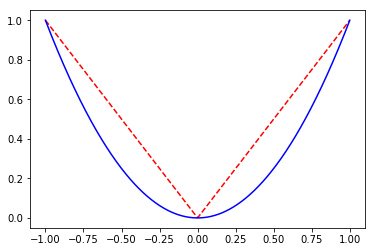

In [43]:
x_array = sess.run(x_vals)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')

### Back Propogation
* It can keep track of operations & automatically update model variables based on back propogation
* Minimize loss function

In [44]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

In [45]:
y_vals

array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.])

In [48]:
x_vals

array([ 0.96727524,  1.04696738,  1.04569504,  0.90581905,  1.02735944,
        0.92236171,  1.07339619,  0.80527031,  0.89690801,  0.9187634 ,
        0.99167368,  1.21924735,  1.06508388,  0.91346623,  0.87038911,
        1.00209266,  1.0988418 ,  0.9564379 ,  1.08451251,  1.14720616,
        0.97421059,  0.75005957,  1.00514868,  0.88947382,  0.92551077,
        1.02922274,  0.80994198,  0.93239088,  0.95713069,  1.06055085,
        1.00317452,  0.98869983,  0.83858811,  1.08068019,  1.0897093 ,
        1.04847203,  1.14777602,  0.99948277,  0.97286985,  1.02884656,
        0.78426923,  1.0099864 ,  0.92375207,  0.86365626,  0.98346889,
        1.06127619,  1.0180148 ,  1.06508045,  0.91185556,  1.10779932,
        0.94185985,  0.91680898,  0.94315404,  1.00096129,  1.05616261,
        1.01207684,  0.80418888,  0.96706901,  1.24391973,  0.81147358,
        1.08656906,  0.93477843,  0.96271066,  0.98447399,  0.9583596 ,
        0.94378991,  0.96300808,  1.02769399,  1.08669075,  0.99

In [50]:
my_output = tf.mul(x_data, A)

In [51]:
loss = tf.square(my_output - y_target)

In [53]:
init = tf.global_variables_initializer()
sess.run(init)

In [54]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

In [55]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    print('Loss ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Loss [ 72.73432922]
Loss [ 64.07601166]
Loss [ 62.92261124]
Loss [ 54.55478668]
Loss [ 51.98026276]
Loss [ 47.87427139]
Loss [ 38.76089478]
Loss [ 51.03902435]
Loss [ 48.17140579]
Loss [ 37.31684113]
Loss [ 40.37000275]
Loss [ 32.57803726]
Loss [ 25.75200272]
Loss [ 36.30051804]
Loss [ 21.6240921]
Loss [ 29.28386688]
Loss [ 32.52169037]
Loss [ 17.96669006]
Loss [ 13.47986507]
Loss [ 12.76614761]
Loss [ 19.17869949]
Loss [ 20.2830162]
Loss [ 14.81246662]
Loss [ 13.37816238]
Loss [ 14.1294775]
Loss [ 7.3286171]
Loss [ 11.84623051]
Loss [ 4.77955675]
Loss [ 6.64821625]
Loss [ 6.661201]
Loss [ 3.77145076]
Loss [ 7.11289835]
Loss [ 11.79492664]
Loss [ 10.70361805]
Loss [ 6.14356899]
Loss [ 6.20595598]
Loss [ 6.22654009]
Loss [ 3.49200058]
Loss [ 1.3263427]
Loss [ 5.53844547]
Loss [ 0.94972771]
Loss [ 2.33993626]
Loss [ 4.78512096]
Loss [ 0.0718959]
Loss [ 10.40126133]
Loss [ 6.16333675]
Loss [ 2.61272669]
Loss [ 0.00093092]
Loss [ 3.50964808]
Loss [ 7.70241213]
Loss [ 0.28372109]
Loss [ 0.2